# Projet d'analyse numérique

In [1]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
import random as rand
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import FormatStrFormatter

## A. Introduction

L'objectif principal de ce projet est la recherche numérique d'extrema de fonctions à plusieurs variables à valeurs réelles. 
\
Ainsi seront étudiées différentes méthodes permettant de répondre à cette problématique et aussi sera effectuée une application concrète sur une 
problématique réelle. 
\
Enfin seront apportés quelques compléments que nous avons trouvés intéressants concernant cette problématique.

## B. Optimisation d’une fonction d’une variable réelle

Les fonctions que nous considérerons dans cette partie sont des fonctions continues définies sur $[a,b]$.

**Question 1:** 

Méthode par balayage à pas constant :

In [2]:
def BalConstant (f,a,b,N):
    dx=(b-a)/N
    min = f(a)
    for i in range (1,N+1):
        if f(a+i*dx)<min:
            min = f(a+i*dx)
    return min

Méthode par balayage aléatoire :

In [3]:
def BalAlea (f,a,b,N):
    X=[rand.uniform(a,b) for i in range (N+1)]
    min = f(X[0])
    for x in X:
        if f(x)<min:
            min = f(x)
    return min

**Question 2:**

In [4]:
#Fonction 1
def pol(x):
    return x**3 - 3*x**2+2*x+5
    
# Autre polynome pour test : Fonction 2 
def pol2(x): 
    return x**4-2*x**3+x**2-5*x+2
    
#Ces fonctions rentrent bien dans les hypothèses.

In [5]:
a=0
b=3
N=100
print("1) Méthode par balayage à pas constant:",BalConstant(pol,a,b,N))
print("1) Méthode par balayage aléatoire :",BalAlea(pol,a,b,N))
print("2) Méthode par balayage à pas constant:",BalConstant(pol2,a,b,N))
print("2) Méthode par balayage aléatoire :",BalAlea(pol2,a,b,N))

1) Méthode par balayage à pas constant: 4.615379000000001
1) Méthode par balayage aléatoire : 4.615556668830613
2) Méthode par balayage à pas constant: -5.099743750000002
2) Méthode par balayage aléatoire : -5.099170416541669


Ces valeurs sont cohérentes avec les résultats réels.

**Question 3:**

Soit $A_N$ l'approximation du minimum de la fonction et $a_r$ et la valeur réelle du minimum.

Déterminons $e_n = \lvert A_N-a_r\rvert$ pour la fonction $f(x)=x^3-3x^2+2x+5$.

In [6]:
def erreur(methBal,minReel,Nmax,a,b):
    X=[x for x in range (1,Nmax+1)]
    Y=[]
    Z=[]
    for i in range (1,Nmax+1):
        Z.append(np.abs(methBal(pol,a,b,i)-minReel))
        Y.append(log(np.abs(methBal(pol,a,b,i)-minReel)))
    plt.figure(figsize=plt.figaspect(0.4))
    plt.subplot(211)
    plt.title(f"Méthode {methBal.__name__}")
    plt.plot(X,Y,color='m',label=r"$\log e_n$")
    plt.legend()
    plt.subplot(212)
    plt.plot(X,Z,color="g",label=r"$e_n$")
    plt.legend()

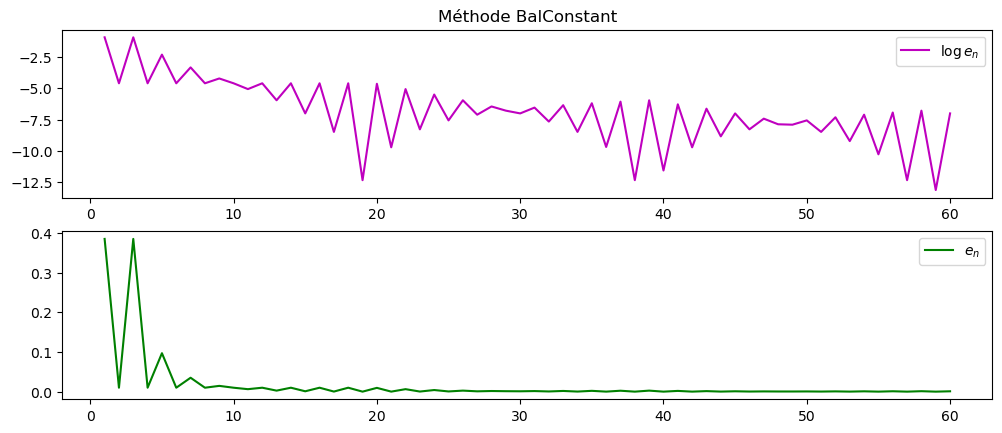

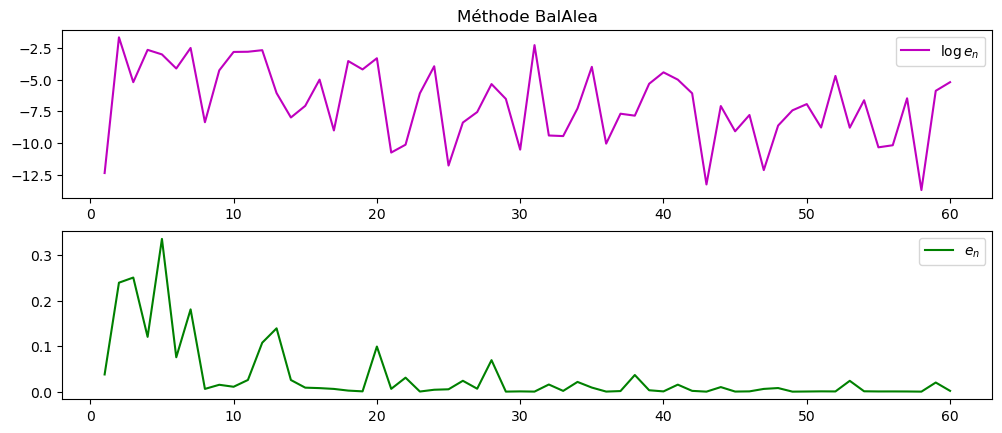

In [7]:
minReel= 5 - 2/(3*sqrt(3))
erreur(BalConstant,minReel,60,a,b)
erreur(BalAlea,minReel,60,a,b)

On constate que la méthode de balayage à pas constant semble plus efficace et plus **fiable**. 
\
En effet, l'erreur semble décroître et tendre vers 0 de manière *relativement* régulière pour cette méthode tandis que la méthode de balayage aléatoire elle semble plus imprévisible. 
\
Dans les faits, on observe aussi une décroissance et une tendance à tendre vers 0 mais avec des pics réguliers, pics qui ne sont pas présents dans l'autre méthode. \
D'où la conclusion.

**Question 4:**

Modifions légèremente le code de la méthode de balayage à pas constant précédent pour cette fois-ci obtenir le maximum de la fonction.

In [8]:
def BalConstantMax(f,a,b,N):
    dx=(b-a)/N
    max = f(a)
    for i in range (1,N+1):
        if f(a+i*dx)>max:
            max= f(a+i*dx)
    return max

In [9]:
print("1)",BalConstantMax(pol,a,b,N))
print("2)",BalConstantMax(pol2,a,b,N))

1) 11.0
2) 23.0


Ces valeurs sont cohérentes avec les résultats réels.


**Question 5**

Soit le point d'abscisse $x_n$. Considérons d'abord le cas où ce dernier est un minimum, alors $x_{n+1}=x_{n}$ car dans ce cas on aurait $f'(x_n)=0$.

Maintenant si ce n'est pas le cas, alors en choisissant $u$ assez petit et **négatif** (car sinon on reculerait quand la fonction est décroissante et n'atteindrions donc pas le minimum, mais un potentiel maximum), on avance de manière précise et proportionnelle à la pente de la courbe vers le minimum, cette pente étant donc non nulle.\
Ainsi, en général $x_{n+1}$ est plus proche du minimum que $x_n$ car nous avons avancé proportionellement à la pente et c'est celle-ci qui est indicatrice et qui caractérise un minimimum par le fait qu'elle soit nulle en ce dernier. \
C'est le cas en général du fait que si le pas $u$ est trop élevé ou que si nous sommes extrêment proches du minimum mais pas exactement à ce dernier, il est possible de le dépasser (car $f'(x_n)\neq 0$) et donc de s'en éloigner potentiellement le temps d'une itération et donc d'avoir un contre-exemple.

**Question 6**

In [10]:
#Définition des dérivées des fonctions 1 et 2 précédentes
def df(x):
    return 3*x**2 - 6*x + 2
    
def df2(x):
    return 4*x**3 - 6*x**2 + 2*x - 5        

In [11]:
#Méthode avec le premier terme choisie manuellement
def Grad1D(f,df,x0,u,N):
    xn=x0
    for i in range(N-1):
        xn1=xn+u*df(xn)
        xn=xn1
    return f(xn)
#Méthode avec premier terme choisie aléatoirement dans l'intervalle
def Grad1DVariante(f,df,a,b,u,N):
    xn=rand.uniform(a,b)
    for i in range(N-1):
        xn1=xn+u*df(xn)
        xn=xn1
    return f(xn)

In [12]:
print("1)x_0 imposée:",Grad1D(pol,df,1,-0.001,10000))
print("1)x_0 aléatoire:",Grad1DVariante(pol,df,0,3,-0.001,10000))
print("2)x_0 imposée:",Grad1D(pol2,df2,1,-0.001,10000))
print("2)x_0 aléatoire:",Grad1DVariante(pol2,df2,0,3,-0.001,10000))

1)x_0 imposée: 4.61509982054025
1)x_0 aléatoire: 4.61509982054025
2)x_0 imposée: -5.099892037763601
2)x_0 aléatoire: -5.099892037763601


Ces résultats sont cohérents.

**Question 7**

***a.*** 

Soit: $$\varphi (t)=f(x_n + tf'(x_n))$$
\
On a donc: $$\varphi '(t)= f'(x_n).f'(x_n + tf'(x_n))$$
Et: $$\varphi ''(t)= (f'(x_n))^2.f''(x_n + tf'(x_n))$$
D'où: $$\varphi'(0)=(f'(x_n))^2,~\varphi''(0)=(f'(x_n))^2.f''(x_n) $$

***b.***

On a donc: $$\varphi'(t)=(f'(x_n))^2+(f'(x_n))^2.f''(x_n))t+o_{0}(t)$$
Il ne reste maintenant plus qu'à chercher $t_{opt}~$ tel que $\varphi'(t_{opt})=0$ pour obtenir $u=t_{opt}$.

On ommettra dans la suite le $o_{0}(t)$ pour ne pas surcharger la notation mais nous gardons tout de même à l'esprit que l'égalité n'est pas parfaite. \
D'où: $$u=-\frac{1}{f''(x_n)}$$
On a donc au final: $$x_{n+1}=x_n-\frac{f'(x_n)}{f''(x_n)} $$
En posant $g(x)=f'(x)$, on retrouve la **méthode de Newton**: $$x_{n+1}=x_n-\frac{g(x_n)}{g'(x_n)}$$

## C. Optimisation d’une fonction de deux variables réelles

Soient les fonctions de deux variables $g$ et $h$ définies par: $$g_{a,b}(x,y)=\frac{x^2}{a}+\frac{y^2}{b},~ h(x,y)=\cos x \sin y $$ 

On précise quand dans toute cette partie le gradient de couleur utilisé est le même. Plus la couleur s'approche du violet, plus les valeures prises sont petites et inversement pour le jaune. *(Exemple avec des valeurs à la question 9)* 

**Question 8**

In [13]:
#Définition des fonctions g et h:
def g(X,Y,a=2,b=2/7):
    return ((X**2) / a) + ((Y**2) / b)

def h(X,Y):
    return np.cos(X)*np.sin(Y)

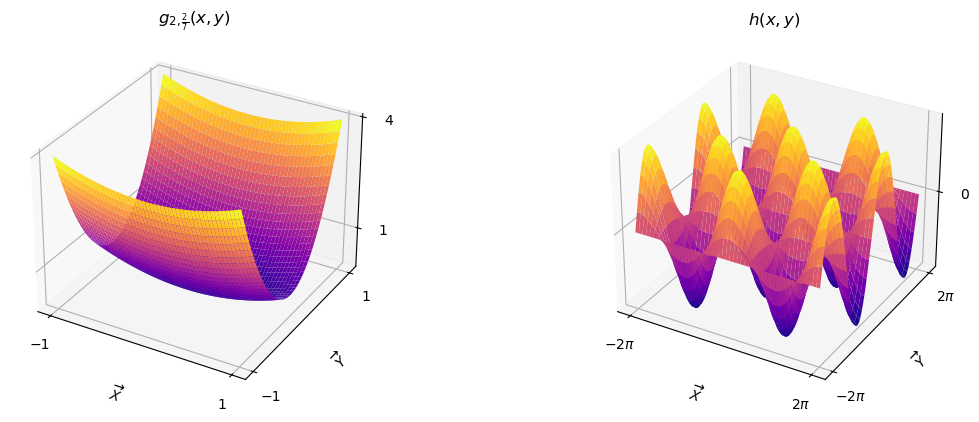

In [14]:
#Definition de la figure en entière
fig = plt.figure(figsize=plt.figaspect(0.35))

#Définition de g
ax = fig.add_subplot(1,2,1,projection='3d')
plt.title(r"$g_{2,\frac{2}{7}}(x,y)$")

x = np.linspace(-1, 1, 1000)
y = np.linspace(-1, 1, 1000)
X,Y= np.meshgrid(x,y)
Z = g(X,Y)

ax.set_xticks([-1,1])
ax.set_yticks([-1,1])
ax.set_zticks([1,4])

ax.set_xlabel(r'$\overrightarrow{X}$')
ax.set_ylabel(r'$\overrightarrow{Y}$')

ax.plot_surface(X, Y, Z,cmap="plasma")

#Définition de h
ax = fig.add_subplot(1,2,2,projection='3d')
plt.title(r"$h(x,y)$")

x2 = np.linspace(-2*np.pi, 2*np.pi, 2000)
y2 = np.linspace(-2*np.pi, 2*np.pi, 2000)
X2,Y2= np.meshgrid(x2,y2)
Z2 = h(X2,Y2)

ax.set_xticks([-2*np.pi,2*np.pi],[r"$-2\pi$",r"$2\pi$"])
ax.set_yticks([-2*np.pi,2*np.pi],[r"$-2\pi$",r"$2\pi$"])
ax.set_zticks([0])

ax.set_xlabel(r'$\overrightarrow{X}$')
ax.set_ylabel(r'$\overrightarrow{Y}$')


ax.plot_surface(X2, Y2, Z2,cmap="plasma")

#Afficher la figure
plt.show()

**Question 9**

1. Fonction $g_{2,\frac{2}{7}}(x,y)$:

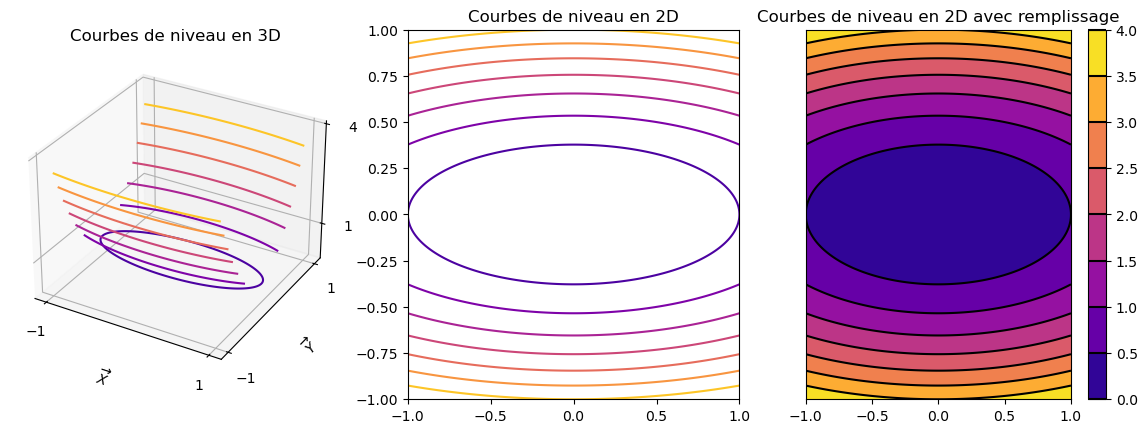

In [15]:
#Figure global
fig = plt.figure(figsize=plt.figaspect(0.33))
# Ligne de niveau en 3D
ax = fig.add_subplot(1,3,1,projection='3d')
plt.title("Courbes de niveau en 3D")

ax.set_xticks([-1,1])
ax.set_yticks([-1,1])
ax.set_zticks([1,4])

ax.set_xlabel(r'$\overrightarrow{X}$')
ax.set_ylabel(r'$\overrightarrow{Y}$')

ax.contour(X, Y, Z, levels= 7,cmap="plasma")  
#Ligne de niveau en 2D

ax = fig.add_subplot(1,3,2)
plt.title("Courbes de niveau en 2D")

ax.contour(X, Y, Z, cmap="plasma") 

#Ligne de niveau en 2D avec remplissage
ax = fig.add_subplot(1,3,3)
plt.title("Courbes de niveau en 2D avec remplissage")

ax.set_yticks([])

CS=ax.contour(X, Y, Z,colors="black") 
CS2 = ax.contourf(X, Y, Z,cmap="plasma") 

cbar = fig.colorbar(CS2)
cbar.add_lines(CS)


plt.show()

2. Fonction $h(x,y)$:

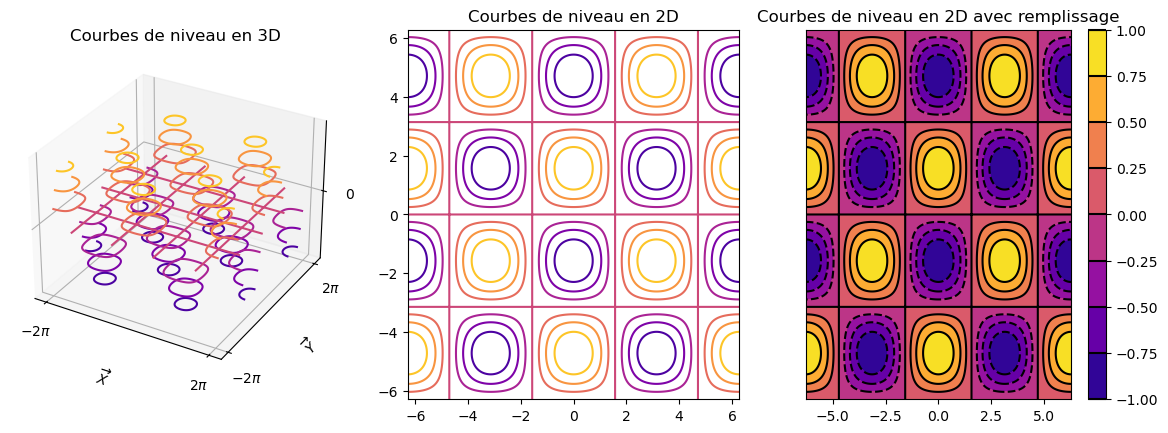

In [16]:
#Figure global
fig = plt.figure(figsize=plt.figaspect(0.33))
# Ligne de niveau en 3D
ax = fig.add_subplot(1,3,1,projection='3d')
plt.title("Courbes de niveau en 3D")

ax.set_xticks([-2*np.pi,2*np.pi],[r"$-2\pi$",r"$2\pi$"])
ax.set_yticks([-2*np.pi,2*np.pi],[r"$-2\pi$",r"$2\pi$"])
ax.set_zticks([0])

ax.set_xlabel(r'$\overrightarrow{X}$')
ax.set_ylabel(r'$\overrightarrow{Y}$')

ax.contour(X2, Y2, Z2,cmap="plasma")  
#Ligne de niveau en 2D

ax = fig.add_subplot(1,3,2)
plt.title("Courbes de niveau en 2D")

ax.contour(X2, Y2, Z2,cmap="plasma") 

#Ligne de niveau en 2D avec remplissage
ax = fig.add_subplot(1,3,3)
plt.title("Courbes de niveau en 2D avec remplissage")

ax.set_yticks([])

CS=ax.contour(X2, Y2, Z2,colors="black") 
CS2 = ax.contourf(X2, Y2, Z2,cmap="plasma") 

cbar = fig.colorbar(CS2)
cbar.add_lines(CS)

plt.show()

**Question 10**

Calculons les gradients des fonctions $g_{a,b}$ et $h$. \
On a donc : $$ \overrightarrow{grad}~(g_{a,b}(x,y))= \left( \frac{2}{a}x,\frac{2}{b}y\right)$$
Et $$ \overrightarrow{grad}~(h(x,y))=(-\sin x \sin y,\cos x \cos y)$$

**Question 11**










In [17]:
#Définition des gradients des deux fonctions:
def gradg(x,y,a=2,b=2/7):
    return [(2/a)*x,(2/b)*y]
def gradh(x,y,a=0,b=0):
    return [-sin(x)*sin(y) ,cos(x)*cos(y) ]

In [18]:
X,Y=[rand.randrange(-6,6) for x in range (4) ],[rand.randrange(-6,6) for x in range (4) ]
for x,y in zip(X,Y):
    gg = gradg(x,y)
    gh = gradh(x,y)
    print(f"g) Au point ({x},{y}): grad={gg} et la norme est {np.linalg.norm(gg)}") #Valeurs par défaut de a et b pour calculer qql valeurs de grad(g) 
    print(f"h) Au point ({x},{y}): grad={gh} et la norme est {np.linalg.norm(gh)}") 

g) Au point (2,-5): grad=[2.0, -35.0] et la norme est 35.05709628591621
h) Au point (2,-5): grad=[-0.8719473754718751, -0.11804512112857041] et la norme est 0.8799016287145682
g) Au point (0,2): grad=[0.0, 14.0] et la norme est 14.0
h) Au point (0,2): grad=[-0.0, -0.4161468365471424] et la norme est 0.4161468365471424
g) Au point (5,-6): grad=[5.0, -42.0] et la norme est 42.2965719651132
h) Au point (5,-6): grad=[0.2679383039400445, 0.27236400192809523] et la norme est 0.38206424101786224
g) Au point (-1,4): grad=[-1.0, 28.0] et la norme est 28.0178514522438
h) Au point (-1,4): grad=[-0.6368273410318358, -0.35316515556860967] et la norme est 0.7281996219399447


**Question 12**

In [19]:
def gradpc(eps,MaxIter,u,x0,y0,gradf,a=2,b=2/7):
    X=[x0]
    Y=[y0]
    nrg = np.linalg.norm(gradf(X[0],Y[0],a,b))
    nbIter = 0
    while(nrg>eps and nbIter<MaxIter):
        GRD = gradf(X[-1],Y[-1],a,b)
        X.append(X[-1]+u*GRD[0])
        Y.append(Y[-1]+u*GRD[1])
        nbIter=nbIter+1
        nrg = np.linalg.norm(gradf(X[-1],Y[-1],a,b))
    print("Maximum d'itération atteint:",nbIter>=MaxIter,"| Nombre d'itération:",nbIter)
    return X,Y    

**Question 13**

Maximum d'itération atteint: False | Nombre d'itération: 6548


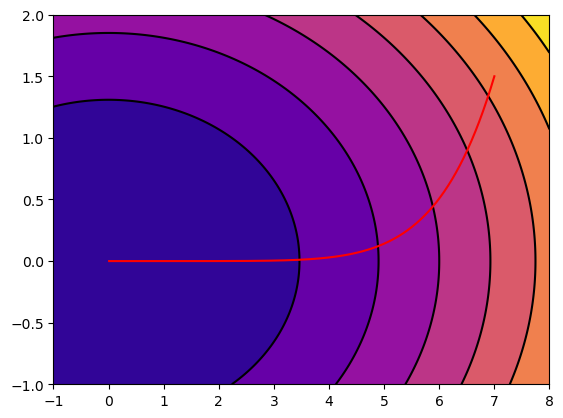

In [20]:
Xn,Yn = gradpc(0.01,10000,-0.001,7,1.5,gradg)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#Redéfinition des intervalles pour une meilleur visualisation.
x = np.linspace(-1, 8, 1000)
y = np.linspace(-1, 2, 1000)
X,Y= np.meshgrid(x,y)
Z = g(X,Y)

ax.contour(X, Y, Z,colors="black") 
ax.contourf(X, Y, Z,cmap="plasma") 
plt.plot(Xn,Yn,color="red")

plt.show()

Maximum d'itération atteint: False | Nombre d'itération: 528


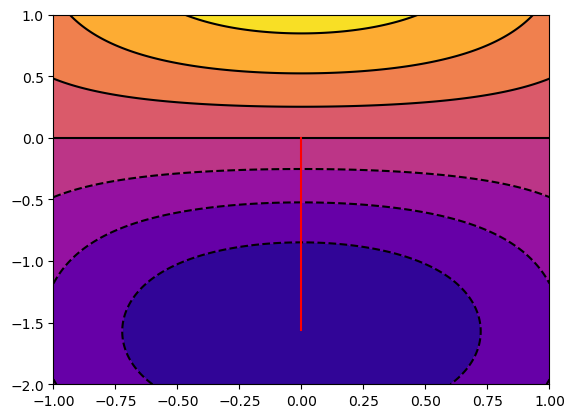

In [21]:
Xn,Yn = gradpc(0.01,1000,-0.01,0,0,gradh)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#Redéfinition des intervalles pour une meilleur visualisation.
x = np.linspace(-1, 1, 1000)
y = np.linspace(-2, 1, 1000)
X,Y= np.meshgrid(x,y)
Z = h(X,Y)

ax.contour(X, Y, Z,colors="black") 
ax.contourf(X, Y, Z,cmap="plasma") 
plt.plot(Xn,Yn,color="red")

plt.show()

On constate que les suites $(x_{n},y_{n})$ convergent bien vers un minumum local de chaque fonction. Cependant, on constate que le nombre d'itérations nécéssaire est relativement important.

**Question 14**

Le minimum de la fonction $g_{1,20}$ se situe au point de coordonnées $(0,0)$. \
Ainsi, on a:

Point vert: Départ | Point rouge: Arrivée
u= -0.99
Maximum d'itération atteint: True | Nombre d'itération: 120
u= -0.8801111111111111
Maximum d'itération atteint: False | Nombre d'itération: 68
u= -0.7702222222222223
Maximum d'itération atteint: False | Nombre d'itération: 78
u= -0.6603333333333333
Maximum d'itération atteint: False | Nombre d'itération: 91
u= -0.5504444444444445
Maximum d'itération atteint: False | Nombre d'itération: 110
u= -0.4405555555555556
Maximum d'itération atteint: True | Nombre d'itération: 120
u= -0.33066666666666666
Maximum d'itération atteint: True | Nombre d'itération: 120
u= -0.22077777777777785
Maximum d'itération atteint: True | Nombre d'itération: 120
u= -0.11088888888888893
Maximum d'itération atteint: True | Nombre d'itération: 120
u= -0.001
Maximum d'itération atteint: True | Nombre d'itération: 120


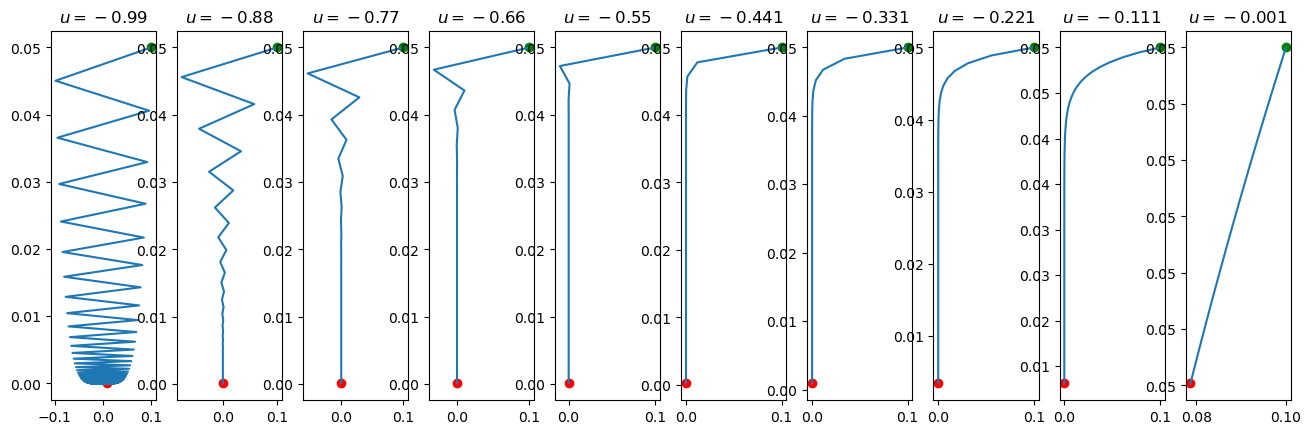

In [22]:
fig = plt.figure(figsize=plt.figaspect(0.3))

U=np.linspace(-0.99,-0.001,10)
eps=10**(-5)
MaxIter = 120

print("Point vert: Départ | Point rouge: Arrivée") 

for index,u in enumerate(U):
    print("u=",u)  
    ax = fig.add_subplot(1,10,index+1)      
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.yticks(fontsize=10)
    plt.title(fr"$u={round(u,3)}$")
    Xn,Yn = gradpc(eps,MaxIter,u,0.1,0.05,gradg,1,20)
    plt.plot(Xn,Yn)
    plt.scatter(Xn[0],Yn[0],color="green")
    plt.scatter(Xn[-1],Yn[-1],color="red")    

Il est à noter que nous avons ici représenté uniquement ces courbes pour un point de départ $(x_0,y_0)=(0.1,0.05)$. \
Ce dernier est donc très proche du minimum de la fonction, cependant on remarque tout de même que la méthode a du mal à converger correctement avec la précision demandée pour de nombreuses valeurs de $u$. Nous avons tracé ces courbes pour différents points initiaux mais pour ne pas surcharger le document, nous ne les avons pas affichées. Cependant, nous avons remarqué que peu importe le point initial, nous observons le même comportement, c'est à dire une non-convergence avec la précision demandée pour de nombreuses valeurs de u, ces dernières étant d'autant plus nombreuses que l'on éloigne du point initial. Par exemple pour $(x_0,y_0)=(7,1.5)$, seul pour $u=-0.88$ on obtient un résultat concluant, de même pour $(x_0,y_0)=(3,1.4)$.  \
Cela s'explique par le fait que cette méthode converge lentement et nécéssite souvent un **grand nombre d'itérations**, ce qui n'est pas le cas ici du fait du nombre d'itérations imposé. (*On note aussi qu'il est **possible** que pour des valeurs de $u$ trop grandes, la méthode ne converge tout simplement pas, ce cas de figure n'a donc pas de lien avec la vitesse de convergence. Selon nos observations, il semblerait que cela ne se produise pas ici*)\
On en conclut que cette méthode permet bien une convergence vers le minimum d'une fonction, mais que cependant celle-ci et sa vitesse de convergence est très dépendante du pas $u$ pour lequel en pratique nous n'avons pour l'instant pas de moyen de savoir quelle valeur lui attribuer exactement pour obtenir de meilleurs résultats. 

**Question 15**

In [23]:
def gradpcamMax(eps,MaxIter,u,x0,y0,f,gradf):
    X=[x0]
    Y=[y0]
    nrg = np.linalg.norm(gradf(X[0],Y[0]))
    nbIter = 0
    while(nrg>eps and nbIter<MaxIter):
        GRD = gradf(X[-1],Y[-1])
        k=1
        F1= f(X[-1]+u*GRD[0],Y[-1]+u*GRD[1])
        F2= f(X[-1]+2*u*GRD[0],Y[-1]+2*u*GRD[1])
        while(F1<F2):
            k=k+1
            F1= f(X[-1]+k*u*GRD[0],Y[-1]+k*u*GRD[1])
            F2= f(X[-1]+(k+1)*u*GRD[0],Y[-1]+(k+1)*u*GRD[1])
        X.append(X[-1]+(k)*u*GRD[0])
        Y.append(Y[-1]+(k)*u*GRD[1])
        nbIter=nbIter+1
        nrg = np.linalg.norm(gradf(X[-1],Y[-1]))
    print("Maximum d'itération atteint:",nbIter>=MaxIter,"| Nombre d'itération:",nbIter)
    return X,Y  

On test notre algorithme sur la fonction $h$ pour différents points initiaux étant donné que la fonction $g$ n'admet pas de maximum sur $\mathbb{R}^2$. \
On prendra en particulier $(x_0,y_0)=(0.75,0)$ et $(x_0,y_0)=(-0.9,0.75)$.

*En testant cet algorithme sur $g$, on a une boucle infinie lors de la recherche du $k$ optimal. Le programme ne se termine jamais. Il faut aisni être prudent ou rajouter une condition de fin au risque de brider l'algorithme.*

Test 1: Rouge
Maximum d'itération atteint: False | Nombre d'itération: 2
Test 2: Vert
Maximum d'itération atteint: False | Nombre d'itération: 2


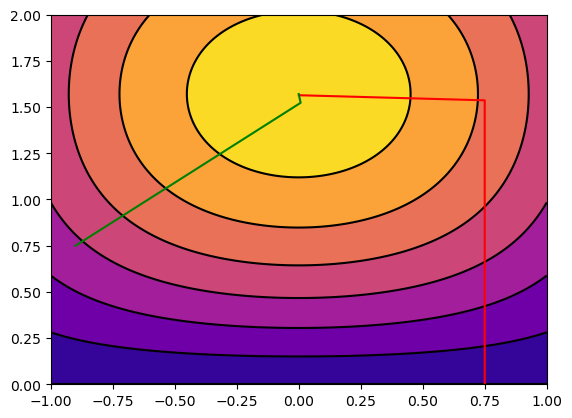

In [24]:
print("Test 1: Rouge")
Xn,Yn = gradpcamMax(0.01,10,0.1,0.75,0,h,gradh)
print("Test 2: Vert")
Xn2,Yn2 = gradpcamMax(0.01,10,0.1,-0.9,0.75,h,gradh)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = np.linspace(-1, 1, 1000)
y = np.linspace(0, 2, 1000)
X,Y= np.meshgrid(x,y)
Z = h(X,Y)
CS=ax.contour(X, Y, Z,colors="black") 
CS2 = ax.contourf(X, Y, Z,cmap="plasma") 
plt.plot(Xn,Yn,color="red")
plt.plot(Xn2,Yn2,color="green")

plt.show()

La méthode converge bien pour ces exemples. On remarque qu'il a fallu très peu d'itérations.

**Question 16**

In [25]:
def gradpcamMin(eps,MaxIter,u,x0,y0,f,gradf,a=2,b=2/7):
    X=[x0]
    Y=[y0]
    nrg = np.linalg.norm(gradf(X[0],Y[0],a,b))
    nbIter = 0
    while(nrg>eps and nbIter<MaxIter):
        GRD = gradf(X[-1],Y[-1],a,b)
        k=1
        F1= f(X[-1]+u*GRD[0],Y[-1]+u*GRD[1])
        F2= f(X[-1]+2*u*GRD[0],Y[-1]+2*u*GRD[1])
        while(F1>F2):
            k=k+1
            F1= f(X[-1]+k*u*GRD[0],Y[-1]+k*u*GRD[1])
            F2= f(X[-1]+(k+1)*u*GRD[0],Y[-1]+(k+1)*u*GRD[1])
        X.append(X[-1]+(k)*u*GRD[0])
        Y.append(Y[-1]+(k)*u*GRD[1])
        nbIter=nbIter+1
        nrg = np.linalg.norm(gradf(X[-1],Y[-1],a,b))
    print("Maximum d'itération atteint:",nbIter>=MaxIter,"| Nombre d'itération:",nbIter)
    return X,Y    

Testons cet algortihme sur les fonctions $g$ et $h$ pour des points initiaux différents. 

Fonction $g_{2,\frac{2}{7} }$:

Test 1: Rouge
Maximum d'itération atteint: True | Nombre d'itération: 20
Test 2: Vert
Maximum d'itération atteint: False | Nombre d'itération: 13


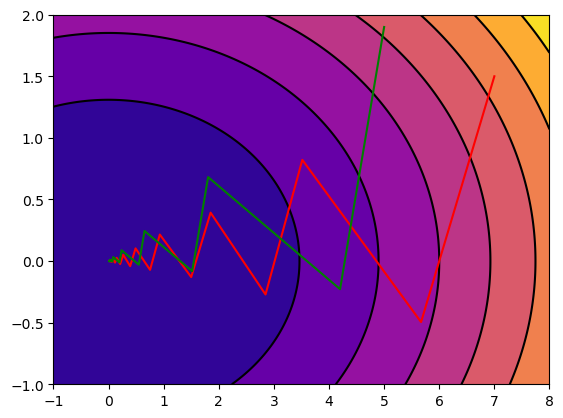

In [26]:
print("Test 1: Rouge")
Xn,Yn = gradpcamMin(0.01,20,-0.01,7,1.5,g,gradg)
print("Test 2: Vert")
Xn2,Yn2 = gradpcamMin(0.01,20,-0.01,5,1.9,g,gradg)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = np.linspace(-1, 8, 1000)
y = np.linspace(-1, 2, 1000)
X,Y= np.meshgrid(x,y)
Z = g(X,Y)
CS=ax.contour(X, Y, Z,colors="black") 
CS2 = ax.contourf(X, Y, Z,cmap="plasma") 
plt.plot(Xn,Yn,color="red")
plt.plot(Xn2,Yn2,color="green")

plt.show()

Fonction $h$:

Test 1: Rouge
Maximum d'itération atteint: False | Nombre d'itération: 3
Test 2: Vert
Maximum d'itération atteint: False | Nombre d'itération: 2


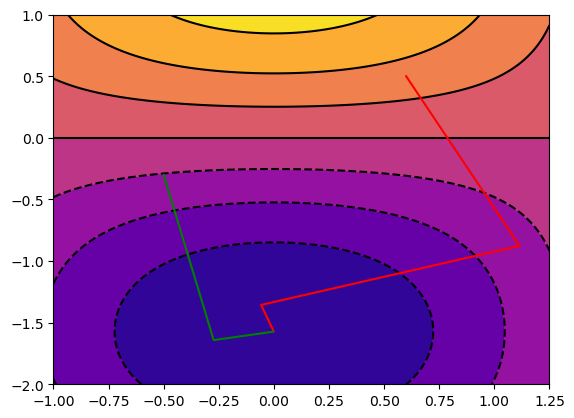

In [27]:
print("Test 1: Rouge")
Xn,Yn = gradpcamMin(0.01,10,-0.1,0.6,0.5,h,gradh)
print("Test 2: Vert")
Xn2,Yn2 = gradpcamMin(0.01,10,-0.1,-0.5,-0.3,h,gradh)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = np.linspace(-1, 1.25, 1000)
y = np.linspace(-2, 1, 1000)
X,Y= np.meshgrid(x,y)
Z = h(X,Y)
CS=ax.contour(X, Y, Z,colors="black") 
CS2 = ax.contourf(X, Y, Z,cmap="plasma") 
plt.plot(Xn,Yn,color="red")
plt.plot(Xn2,Yn2,color="green")

plt.show()

On observe que la méthode converge bien pour les deux exemples. Cela avec un nombre d'itérations faible.

**Question 17**

On procède de la même façon que précedemment:

Point vert: Départ | Point rouge: Arrivée
u= -0.99
Maximum d'itération atteint: True | Nombre d'itération: 120
u= -0.8801111111111111
Maximum d'itération atteint: False | Nombre d'itération: 80
u= -0.7702222222222223
Maximum d'itération atteint: False | Nombre d'itération: 74
u= -0.6603333333333333
Maximum d'itération atteint: False | Nombre d'itération: 62
u= -0.5504444444444445
Maximum d'itération atteint: False | Nombre d'itération: 31
u= -0.4405555555555556
Maximum d'itération atteint: False | Nombre d'itération: 37
u= -0.33066666666666666
Maximum d'itération atteint: False | Nombre d'itération: 65
u= -0.22077777777777785
Maximum d'itération atteint: False | Nombre d'itération: 83
u= -0.11088888888888893
Maximum d'itération atteint: False | Nombre d'itération: 35
u= -0.001
Maximum d'itération atteint: False | Nombre d'itération: 29


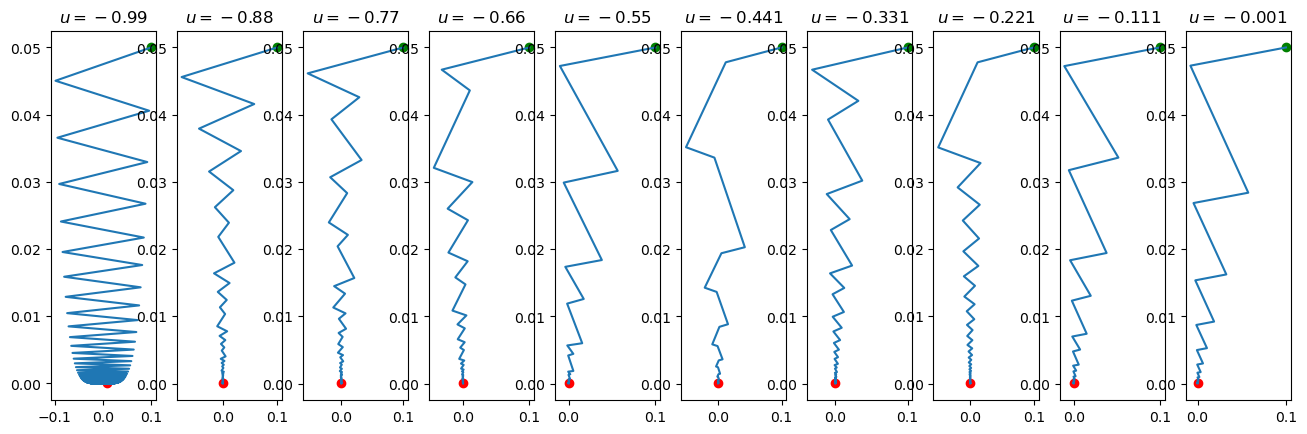

In [28]:
fig = plt.figure(figsize=plt.figaspect(0.3))

U=np.linspace(-0.99,-0.001,10)
eps=10**(-5)
MaxIter = 120

print("Point vert: Départ | Point rouge: Arrivée") 

for index,u in enumerate(U):
    print("u=",u)  
    ax = fig.add_subplot(1,10,index+1)      
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.yticks(fontsize=10)
    plt.title(fr"$u={round(u,3)}$")
    Xn,Yn = gradpcamMin(eps,MaxIter,u,0.1,0.05,g,gradg,1,20)
    plt.plot(Xn,Yn)
    plt.scatter(Xn[0],Yn[0],color="green")
    plt.scatter(Xn[-1],Yn[-1],color="red")    

On constate que pour l'exemple représenté, la méthode du gradient à pas constant amélioré nécéssite **beacoup moins d'itérations** que 
la version classique, et aussi celle-ci est légèrement moins dépendante de valeur de $u$. Ces dernières remarques s'appliquent aussi pour les différents autres exemples que nous avons testé, mais pas représentés pour ne pas surcharger le document.

Ainsi, on en déduit que la méthode du gradient à pas constant amélioré est plus efficace et optimale que la version classique. En effet, avec la version amélioré, on se dirige vers l'extremum avec le plus grand pas possible, ainsi on prend moins d'itérations pour arriver à ce dernier.\
On peut cependant se demander, si la recherche du plus grand $k$ est **toujours** plus rapide et efficace que la méthode classique.

## D. Calcul de l'inverse d'une matrice et résolution de systèmes linéaires

**Question 18**

Dans le cas où l'on considère $n=1$, alors toutes les variables considérées dans cette partie D sont des simples scalaires. Ainsi on l'égalité des transposées ($X^T=X$, $\forall X \in \mathbb{R} $). \
De plus, en dimension $1$, le gradient de $\Phi$ n'est rien d'autre que sa dérivée, c'est à dire $G=\Phi'$. \
On a donc pour le cas $\Phi'(y_k)\neq 0$: $$\rho_k=\frac{{\lvert \Phi'(y_k) \rvert}^2}{2A{\Phi'(y_k)}^2}=\frac{1}{2A}$$
Or on a $\Phi'(y)=2(Ay-b)$, donc  $\Phi''(y)=2A$, $\forall y \in \mathbb{R}$, d'où $$\rho_k=\frac{1}{\Phi''(y_k)} $$ 
En réinjectant dans $y_{k+1}$ on a: $$y_{k+1}=y_k-\frac{\Phi'(y_k)}{\Phi''(y_k)} $$
On retrouve bien l'algorithme de la question 7 Partie B.

**Question 19**

In [29]:
# Définition de G
def G(y,A,b):
    G = 2 * ( np.matmul(A,y) - b )
    return G

# Définition des coefficients rho_k
def rho_k(y,A,b): 
    Grd = G(y,A,b)
    if ( np.array_equal(Grd ,np.zeros((len(Grd[0]),1))) ):
        return 0
    else : 
        tempMult = np.matmul(Grd.T,A)
        return ( np.linalg.norm(Grd)**2) /( 2 * np.matmul( tempMult,Grd) )

def gradPO(MaxIter, y0, A, b, eps): 
    N = 0
    yk = y0
    ykplus1 = yk - rho_k(yk,A,b) * G(yk,A,b)
    while (N<MaxIter and np.linalg.norm(ykplus1-yk)>10**(-eps)) :
        yk=ykplus1
        ykplus1 = yk - rho_k(yk,A,b) * G(yk,A,b)
        N = N + 1
        if (np.array_equal(G(yk,A,b),np.zeros( (len(G(yk,A,b)),1) )  ) ):
            break
    print("Nombre d'itérations: ",N)
    return yk

**Question 20**

Testons cet algorithme avec $n=2$ et $n=3$. \
Pour cela résolvons le système matriciel suivant: $$Ax=b$$
Avec les combinaisons de $A$ et $b$ suivantes:

1. $A=\begin{pmatrix}
2 & 1 \\
1 & 2 \\ 
\end{pmatrix}
$ et $b=\begin{pmatrix}
2 \\
-1 \\ 
\end{pmatrix}$,
résultat théorique: $x=\begin{pmatrix}
\frac{5}{3} \\
-\frac{4}{3} \\ 
\end{pmatrix} \approx \begin{pmatrix}
1.6667 \\
-1.3333 \\ 
\end{pmatrix}$.

2. $A=\begin{pmatrix}
\frac{5}{3} & 1 \\
1 & \frac{5}{3} \\ 
\end{pmatrix}
$ et $b=\begin{pmatrix}
\frac{-4}{7} \\
2 \\ 
\end{pmatrix}$,
résultat théorique: $x=\begin{pmatrix}
\frac{-93}{56} \\
\frac{123}{56} \\ 
\end{pmatrix}\approx \begin{pmatrix}
-1.6607 \\
2.1964 \\ 
\end{pmatrix}$.

3. $A=\begin{pmatrix}
2 & -1 & 0 \\
-1 & 2 & -1 \\
0 & -1 & 2 \\
\end{pmatrix}
$ et $b=\begin{pmatrix}
2 \\
5 \\
-3 \\
\end{pmatrix}$,
résultat théorique: $x=\begin{pmatrix}
\frac{13}{4} \\
\frac{9}{2} \\ 
\frac{3}{4} \\ 
\end{pmatrix} \approx \begin{pmatrix}
3.25 \\
4.5\\ 
0.75\\
\end{pmatrix}$.

4. $A=\begin{pmatrix}
10 & 9 & 7 \\
9 & 10 & 9 \\ 
7 & 9 & 10 \\ 
\end{pmatrix}
$ et $b=\begin{pmatrix}
1 \\
-1 \\
2 \\
\end{pmatrix}$,
résultat théorique: $x=\begin{pmatrix}
\frac{17}{6} \\
-\frac{-11}{2} \\ 
\frac{19}{6} \\ 
\end{pmatrix}\approx \begin{pmatrix}
2.8332 \\
-5.5 \\ 
3.1667 \\ 
\end{pmatrix}$.

*Les matrices $A$ sont bien symétriques définies positives.*

In [30]:
print("1. x=",gradPO(100,np.zeros((2,1)),np.array( [ [2,1],[1,2] ] ), np.array([ [2],[-1] ] ), 5 ) )
print("2. x=",gradPO(100,np.zeros((2,1)),np.array( [ [5/3,1],[1,5/3] ] ), np.array([ [-4/7],[2] ] ), 5 ) )
print("3. x=",gradPO(100,np.zeros((3,1)),np.array( [ [2,-1,0],[-1,2,-1],[0,-1,2] ] ), np.array([ [2],[5],[-3] ] ), 5 ) )
print("4. x=",gradPO(300,np.zeros((3,1)),np.array( [ [10,9,7],[9,10,9],[7,9,10] ] ), np.array([ [1],[-1],[2] ] ), 5 ) )

Nombre d'itérations:  11
1. x= [[ 1.66666667]
 [-1.33332627]]
Nombre d'itérations:  19
2. x= [[-1.66069824]
 [ 2.19642248]]
Nombre d'itérations:  36
3. x= [[3.24999235]
 [4.49998418]
 [0.74999235]]
Nombre d'itérations:  289
4. x= [[ 2.83320681]
 [-5.49975395]
 [ 3.16654014]]


On retrouve bien les résultats théoriques. \
Cet algorithme a pour avantage par rapport aux précédents:

1. Il ne nécéssite pas de donner une quelconque valeur de pas (le $u$ précemment).
2. Le pas optimal est calculé de manière **directe**, il n'y donc pas besoin de faire quelconque itération (la recherche du plus haut $k$ précemment). Ainsi l'algorithme est **plus rapide**.
3. Il est donc plus rapide que si le pas était constant car on avance de manière optimale.
4. Au vue des différents tests que l'on a effectué, nous n'avons pas remarqué de différences notables au niveau des nombres d'itérations par rapport à la version améliorée de la partie C mais par rapport à la version à pas constant celle-ci est nettement plus efficace et rapide à ce niveau.

## E. Application à des problèmes de transfert de la chaleur

**Question 21**

Soit $a=500$ K et $b=350$ K.\
En considérant que les extrémités sont maintenues depuis un temps très long aux températures suivantes: $$T(x=0)=a~\text{et}~T(x=1)=b$$
Alors on a $c=0$ et $f=0$. Ce qui nous donne l'équation différentielle suivante:
$$\forall x \in \left]0,1\right[~,~ \frac{d^2T}{dx^2}(x)=0$$
En intégrant deux fois on obtient le système d'équation suivant:
$$
\left \{
\begin{array}{}
    T(x) = \alpha x + \beta \\
    T(0) = a \\
    T(1) = b 
\end{array}
\right.
$$
Avec $\alpha$ et $\beta$ des réels.\
On détermine les coefficients $\alpha$ et $\beta$ grâce à la méthode de la partie précédente en résolvant le système matriciel suivant: $$Ax=b\Longleftrightarrow\begin{pmatrix}
 1& 1 \\
0 & 1 \\ 
\end{pmatrix}\begin{pmatrix}
\alpha \\
\beta  \\ 
\end{pmatrix}= \begin{pmatrix}
b \\
a \\ 
\end{pmatrix}$$

In [31]:
print("trans(alpha,beta)=\n",gradPO(100,np.zeros((2,1)),np.array( [ [1,1],[0,1] ] ), np.array([ [350],[500] ] ), 5 ) )

Nombre d'itérations:  28
trans(alpha,beta)=
 [[-149.99999679]
 [ 499.99998932]]


**Attention**: on remarque que $A$ n'est **absoulement** pas symétrique définie positive. Il nous a été impossible de trouver une formulation équivalente du système où $A$ possédait ces propriétes. \
Cependant le résultat est cohérent.

Ainsi $T(x)\approx -150x+500$ K

**Question 22**

Soit $\sqrt{\frac{2h}{\lambda R}}=\frac{1}{\sqrt{0.1}}$m$^{-1}$,$T_a=300$K ,$a=500$K et $b=350$K . \
On a à partir des notations de l'énoncé pour cette partie l'équation différentielle suivante:
$$\forall x \in \left]0,1\right[~,~ -\frac{d^2T}{dx^2}(x)+cT(x)=f$$
A partir du polynôme caractéristique et en cherchant une solution particulière de forme constante (pour la solution générale de l'équation différentielle) on trouve comme précedemment un système d'équations:
$$ \left \{
\begin{array}{}
    T(x) = \alpha e^{\sqrt{c}x} + \beta e^{-\sqrt{c}x} + \frac{f}{c} \\
    T(0) = a \\
    T(1) = b 
\end{array}
\right. $$
Avec $\alpha$ et $\beta$ des réels.\
On détermine les coefficients $\alpha$ et $\beta$ grâce à la méthode de la partie précédente en résolvant le système matriciel suivant que l'on a obtenu en reformulant le système précédant pour obtenir $A$ avec les propriétés nécéssaires: 
$$Ax=b\Longleftrightarrow\begin{pmatrix}
e^\sqrt{c} & e^{-\sqrt{c}} \\ 
 e^{-\sqrt{c}} & e^{-\sqrt{c}} \\
\end{pmatrix}\begin{pmatrix}
\alpha \\
\beta  \\ 
\end{pmatrix}= \begin{pmatrix}
b - \frac{f}{c} \\ 
e^{-\sqrt{c}}(a - \frac{f}{c}) \\
\end{pmatrix}$$

In [32]:
# Valeurs numériques
a11= exp(1/sqrt(0.1))
a12= exp(-1/sqrt(0.1))
f=300/0.1
print("trans(alpha,beta)=\n",gradPO(1000,np.zeros((2,1)),np.array( [ [a11,a12],[a12,a12] ] ), np.array([ [350-f*0.1],[a12*(500-f*0.1)] ] ), 5 ) )

Nombre d'itérations:  376
trans(alpha,beta)=
 [[  1.7612562 ]
 [198.23783764]]


Ce résultat est cohérent. 